# MLP - Multilayer Perceptron

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipynb.fs.defs.Additional_metrics import *
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import itertools 
import time

## Trained on 30% samples of the original training dataset

In [2]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [3]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_std, y_train, test_size=0.7, stratify=y_train, random_state=42)

"lbfgs" isnt good on big databases

In [4]:
x = [128,96,64,32,16] 
hd_list = list(itertools.combinations(x,3)) + list(itertools.combinations(x,2)) + [(128,128,128), (96,96,96), (64,64,64), (32,32,32), (128,128), (96,96), (64,64)]
print(hd_list)

[(128, 96, 64), (128, 96, 32), (128, 96, 16), (128, 64, 32), (128, 64, 16), (128, 32, 16), (96, 64, 32), (96, 64, 16), (96, 32, 16), (64, 32, 16), (128, 96), (128, 64), (128, 32), (128, 16), (96, 64), (96, 32), (96, 16), (64, 32), (64, 16), (32, 16), (128, 128, 128), (96, 96, 96), (64, 64, 64), (32, 32, 32), (128, 128), (96, 96), (64, 64)]


In [14]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0

for hd in hd_list:
    for a in ["logistic", "tanh", "relu"]:
        for s in ["sgd", "adam"]:
            for bs in [50]:

                indexes = kf.split(X_train_30, y_train_30)
                acc_tmp = []
                time_tmp = []
                fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

                for train_index, test_index in indexes:

                    X_trainCV1 = X_train_30.iloc[train_index,:]
                    y_trainCV1 = y_train_30.iloc[train_index]

                    X_testCV1 = X_train_30.iloc[test_index,:]
                    y_testCV1 = y_train_30.iloc[test_index]

                    start = time.time()

                    classifier1 = MLPClassifier(hidden_layer_sizes = hd, activation = a,
                                                    solver = s, batch_size = bs, learning_rate = "constant", 
                                                    learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                                                    random_state = 42, early_stopping = True, n_iter_no_change = 10,
                                                    validation_fraction = 0.1, verbose = False)
                    classifier1.fit(X_trainCV1.values, y_trainCV1.values)
                    y_pred1 = classifier1.predict(X_testCV1.values)
                    c1 = confusion_matrix(y_testCV1, y_pred1)               

                    acc_tmp.append(np.trace(c1)/sum(sum(c1)))
                    fin_conf_mat += c1
                    end = time.time()            

                    time_tmp.append(end-start)

                print(i,'. hd = ', hd,', a = ', a,', s = ', s,' bs = ', bs,', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
                acc.append(np.mean(acc_tmp))
                i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0. hd = (128, 96, 64), a = logistic, s = sgd bs = 50, Average accuracy: 0.70033333 | Average execution time: 35.51353035
1. hd = (128, 96, 64), a = logistic, s = adam bs = 50, Average accuracy: 0.85816667 | Average execution time: 11.68062644
2. hd = (128, 96, 64), a = tanh, s = sgd bs = 50, Average accuracy: 0.85655556 | Average execution time: 17.03529773
3. hd = (128, 96, 64), a = tanh, s = adam bs = 50, Average accuracy: 0.85927778 | Average execution time: 11.87460213
4. hd = (128, 96, 64), a = relu, s = sgd bs = 50, Average accuracy: 0.86027778 | Average execution time: 14.57465854
5. hd = (128, 96, 64), a = relu, s = adam bs = 50, Average accuracy: 0.86177778 | Average execution time: 11.1457386



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


6. hd = (128, 96, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.43533333 | Average execution time: 15.43143797
7. hd = (128, 96, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.85627778 | Average execution time: 12.49736838
8. hd = (128, 96, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.85622222 | Average execution time: 18.70481572
9. hd = (128, 96, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.85738889 | Average execution time: 15.51651497
10. hd = (128, 96, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.85911111 | Average execution time: 18.60212226
11. hd = (128, 96, 32), a = relu, s = adam bs = 50, Average accuracy: 0.86127778 | Average execution time: 12.69955301



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


12. hd = (128, 96, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.61277778 | Average execution time: 27.17572236
13. hd = (128, 96, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.85577778 | Average execution time: 14.06299324
14. hd = (128, 96, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.85944444 | Average execution time: 17.85704412
15. hd = (128, 96, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85938889 | Average execution time: 14.32863483
16. hd = (128, 96, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.85872222 | Average execution time: 14.16888828
17. hd = (128, 96, 16), a = relu, s = adam bs = 50, Average accuracy: 0.86472222 | Average execution time: 12.43851471



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


18. hd = (128, 64, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.58494444 | Average execution time: 21.49134955
19. hd = (128, 64, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.85522222 | Average execution time: 12.01993394
20. hd = (128, 64, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.85744444 | Average execution time: 17.51072946
21. hd = (128, 64, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.85777778 | Average execution time: 9.99188929
22. hd = (128, 64, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.86 | Average execution time: 12.61807857
23. hd = (128, 64, 32), a = relu, s = adam bs = 50, Average accuracy: 0.86516667 | Average execution time: 13.03285489

24. hd = (128, 64, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.349 | Average execution time: 7.82832146
25. hd = (128, 64, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.856 | Average execution time: 13.1047205
26. hd = (128, 64, 16), a = tanh, s = sgd bs = 50, Ave

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


30. hd = (128, 32, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.575 | Average execution time: 19.25511622
31. hd = (128, 32, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.85572222 | Average execution time: 12.81665888
32. hd = (128, 32, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.85394444 | Average execution time: 16.37849946
33. hd = (128, 32, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85922222 | Average execution time: 9.4263742
34. hd = (128, 32, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.85983333 | Average execution time: 12.56903386
35. hd = (128, 32, 16), a = relu, s = adam bs = 50, Average accuracy: 0.86283333 | Average execution time: 11.22981596



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


36. hd = (96, 64, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.58822222 | Average execution time: 21.85848484
37. hd = (96, 64, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.85622222 | Average execution time: 9.72804923
38. hd = (96, 64, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.85627778 | Average execution time: 13.11873403
39. hd = (96, 64, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.857 | Average execution time: 11.2296155
40. hd = (96, 64, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.858 | Average execution time: 9.5999321
41. hd = (96, 64, 32), a = relu, s = adam bs = 50, Average accuracy: 0.86277778 | Average execution time: 8.50553765



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


42. hd = (96, 64, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.70511111 | Average execution time: 25.83109903
43. hd = (96, 64, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.85183333 | Average execution time: 10.84446492
44. hd = (96, 64, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.84983333 | Average execution time: 11.76270051
45. hd = (96, 64, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85461111 | Average execution time: 9.23299899
46. hd = (96, 64, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.85411111 | Average execution time: 10.78360963
47. hd = (96, 64, 16), a = relu, s = adam bs = 50, Average accuracy: 0.85994444 | Average execution time: 9.11989627

48. hd = (96, 32, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.28427778 | Average execution time: 6.2520875
49. hd = (96, 32, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.84822222 | Average execution time: 10.71334558
50. hd = (96, 32, 16), a = tanh, s = sgd bs = 5

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


60. hd = (128, 96), a = logistic, s = sgd bs = 50, Average accuracy: 0.83072222 | Average execution time: 32.83046584
61. hd = (128, 96), a = logistic, s = adam bs = 50, Average accuracy: 0.86383333 | Average execution time: 12.51678629
62. hd = (128, 96), a = tanh, s = sgd bs = 50, Average accuracy: 0.85966667 | Average execution time: 20.81953979
63. hd = (128, 96), a = tanh, s = adam bs = 50, Average accuracy: 0.85944444 | Average execution time: 10.94335518
64. hd = (128, 96), a = relu, s = sgd bs = 50, Average accuracy: 0.86272222 | Average execution time: 14.04777904
65. hd = (128, 96), a = relu, s = adam bs = 50, Average accuracy: 0.86683333 | Average execution time: 12.34783297



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


66. hd = (128, 64), a = logistic, s = sgd bs = 50, Average accuracy: 0.83727778 | Average execution time: 33.51268668
67. hd = (128, 64), a = logistic, s = adam bs = 50, Average accuracy: 0.86188889 | Average execution time: 9.7756928
68. hd = (128, 64), a = tanh, s = sgd bs = 50, Average accuracy: 0.86 | Average execution time: 15.55655155
69. hd = (128, 64), a = tanh, s = adam bs = 50, Average accuracy: 0.85905556 | Average execution time: 9.53487382
70. hd = (128, 64), a = relu, s = sgd bs = 50, Average accuracy: 0.85872222 | Average execution time: 14.79906363
71. hd = (128, 64), a = relu, s = adam bs = 50, Average accuracy: 0.86111111 | Average execution time: 9.63736763



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


72. hd = (128, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.83594444 | Average execution time: 33.17097631
73. hd = (128, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.86438889 | Average execution time: 10.48854098
74. hd = (128, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.8595 | Average execution time: 18.81751833
75. hd = (128, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.85961111 | Average execution time: 9.67480035
76. hd = (128, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.86116667 | Average execution time: 13.59636841
77. hd = (128, 32), a = relu, s = adam bs = 50, Average accuracy: 0.86177778 | Average execution time: 10.80062461



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


78. hd = (128, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.836 | Average execution time: 32.19969292
79. hd = (128, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.86183333 | Average execution time: 12.14444718
80. hd = (128, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.85777778 | Average execution time: 14.45454874
81. hd = (128, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85927778 | Average execution time: 9.4323802
82. hd = (128, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.86211111 | Average execution time: 12.35203657
83. hd = (128, 16), a = relu, s = adam bs = 50, Average accuracy: 0.86544444 | Average execution time: 9.35971465



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


84. hd = (96, 64), a = logistic, s = sgd bs = 50, Average accuracy: 0.83588889 | Average execution time: 27.42014456
85. hd = (96, 64), a = logistic, s = adam bs = 50, Average accuracy: 0.86094444 | Average execution time: 8.82082434
86. hd = (96, 64), a = tanh, s = sgd bs = 50, Average accuracy: 0.85705556 | Average execution time: 13.63680487
87. hd = (96, 64), a = tanh, s = adam bs = 50, Average accuracy: 0.86088889 | Average execution time: 8.15802145
88. hd = (96, 64), a = relu, s = sgd bs = 50, Average accuracy: 0.8615 | Average execution time: 13.36535854
89. hd = (96, 64), a = relu, s = adam bs = 50, Average accuracy: 0.86072222 | Average execution time: 8.08235102



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

90. hd = (96, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.8345 | Average execution time: 26.46067157
91. hd = (96, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.86227778 | Average execution time: 8.32977729
92. hd = (96, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.85872222 | Average execution time: 10.47212629
93. hd = (96, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.86244444 | Average execution time: 6.75354342
94. hd = (96, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.86038889 | Average execution time: 10.17725725
95. hd = (96, 32), a = relu, s = adam bs = 50, Average accuracy: 0.86016667 | Average execution time: 7.47479925



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

96. hd = (96, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.83672222 | Average execution time: 25.60969672
97. hd = (96, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.85966667 | Average execution time: 10.55940552
98. hd = (96, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.85588889 | Average execution time: 11.36113505
99. hd = (96, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85633333 | Average execution time: 6.28651805
100. hd = (96, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.85822222 | Average execution time: 8.27913122
101. hd = (96, 16), a = relu, s = adam bs = 50, Average accuracy: 0.86133333 | Average execution time: 7.18453541



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

102. hd = (64, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.83472222 | Average execution time: 22.38015928
103. hd = (64, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.86127778 | Average execution time: 7.44176955
104. hd = (64, 32), a = tanh, s = sgd bs = 50, Average accuracy: 0.85644444 | Average execution time: 9.95445538
105. hd = (64, 32), a = tanh, s = adam bs = 50, Average accuracy: 0.85866667 | Average execution time: 5.56085858
106. hd = (64, 32), a = relu, s = sgd bs = 50, Average accuracy: 0.85544444 | Average execution time: 7.77206998
107. hd = (64, 32), a = relu, s = adam bs = 50, Average accuracy: 0.85855556 | Average execution time: 6.2572916



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


108. hd = (64, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.82633333 | Average execution time: 21.47954054
109. hd = (64, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.85561111 | Average execution time: 8.87327156
110. hd = (64, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.85544444 | Average execution time: 11.60755916
111. hd = (64, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85661111 | Average execution time: 6.52273359
112. hd = (64, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.85755556 | Average execution time: 11.31509333
113. hd = (64, 16), a = relu, s = adam bs = 50, Average accuracy: 0.85933333 | Average execution time: 6.71090488



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


114. hd = (32, 16), a = logistic, s = sgd bs = 50, Average accuracy: 0.82205556 | Average execution time: 18.01218581
115. hd = (32, 16), a = logistic, s = adam bs = 50, Average accuracy: 0.853 | Average execution time: 7.66897612
116. hd = (32, 16), a = tanh, s = sgd bs = 50, Average accuracy: 0.84688889 | Average execution time: 12.00171742
117. hd = (32, 16), a = tanh, s = adam bs = 50, Average accuracy: 0.85066667 | Average execution time: 5.36748233
118. hd = (32, 16), a = relu, s = sgd bs = 50, Average accuracy: 0.84955556 | Average execution time: 8.28793945
119. hd = (32, 16), a = relu, s = adam bs = 50, Average accuracy: 0.85144444 | Average execution time: 4.67745457



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

120. hd = (128, 128, 128), a = logistic, s = sgd bs = 50, Average accuracy: 0.78544444 | Average execution time: 47.63493466
121. hd = (128, 128, 128), a = logistic, s = adam bs = 50, Average accuracy: 0.85605556 | Average execution time: 15.34315758
122. hd = (128, 128, 128), a = tanh, s = sgd bs = 50, Average accuracy: 0.85788889 | Average execution time: 22.93606567
123. hd = (128, 128, 128), a = tanh, s = adam bs = 50, Average accuracy: 0.86088889 | Average execution time: 18.76266847
124. hd = (128, 128, 128), a = relu, s = sgd bs = 50, Average accuracy: 0.85872222 | Average execution time: 17.93351421
125. hd = (128, 128, 128), a = relu, s = adam bs = 50, Average accuracy: 0.86672222 | Average execution time: 19.41446161



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

126. hd = (96, 96, 96), a = logistic, s = sgd bs = 50, Average accuracy: 0.78055556 | Average execution time: 35.63401723
127. hd = (96, 96, 96), a = logistic, s = adam bs = 50, Average accuracy: 0.85283333 | Average execution time: 10.14602976
128. hd = (96, 96, 96), a = tanh, s = sgd bs = 50, Average accuracy: 0.85944444 | Average execution time: 16.04519644
129. hd = (96, 96, 96), a = tanh, s = adam bs = 50, Average accuracy: 0.85894444 | Average execution time: 12.72537599
130. hd = (96, 96, 96), a = relu, s = sgd bs = 50, Average accuracy: 0.85944444 | Average execution time: 14.621101
131. hd = (96, 96, 96), a = relu, s = adam bs = 50, Average accuracy: 0.86116667 | Average execution time: 8.75856729



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


132. hd = (64, 64, 64), a = logistic, s = sgd bs = 50, Average accuracy: 0.67288889 | Average execution time: 24.59817777
133. hd = (64, 64, 64), a = logistic, s = adam bs = 50, Average accuracy: 0.84855556 | Average execution time: 8.91751189
134. hd = (64, 64, 64), a = tanh, s = sgd bs = 50, Average accuracy: 0.85788889 | Average execution time: 12.57724051
135. hd = (64, 64, 64), a = tanh, s = adam bs = 50, Average accuracy: 0.85511111 | Average execution time: 7.47359862
136. hd = (64, 64, 64), a = relu, s = sgd bs = 50, Average accuracy: 0.85994444 | Average execution time: 11.62097044
137. hd = (64, 64, 64), a = relu, s = adam bs = 50, Average accuracy: 0.8585 | Average execution time: 8.29834876

138. hd = (32, 32, 32), a = logistic, s = sgd bs = 50, Average accuracy: 0.29672222 | Average execution time: 6.90347967
139. hd = (32, 32, 32), a = logistic, s = adam bs = 50, Average accuracy: 0.83733333 | Average execution time: 9.89420004
140. hd = (32, 32, 32), a = tanh, s = sgd bs

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


144. hd = (128, 128), a = logistic, s = sgd bs = 50, Average accuracy: 0.83622222 | Average execution time: 35.97032299
145. hd = (128, 128), a = logistic, s = adam bs = 50, Average accuracy: 0.86433333 | Average execution time: 11.29567595
146. hd = (128, 128), a = tanh, s = sgd bs = 50, Average accuracy: 0.85866667 | Average execution time: 18.60812788
147. hd = (128, 128), a = tanh, s = adam bs = 50, Average accuracy: 0.86155556 | Average execution time: 11.34732251
148. hd = (128, 128), a = relu, s = sgd bs = 50, Average accuracy: 0.86066667 | Average execution time: 15.79837184
149. hd = (128, 128), a = relu, s = adam bs = 50, Average accuracy: 0.86777778 | Average execution time: 12.95058131



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


150. hd = (96, 96), a = logistic, s = sgd bs = 50, Average accuracy: 0.83733333 | Average execution time: 28.69170089
151. hd = (96, 96), a = logistic, s = adam bs = 50, Average accuracy: 0.86144444 | Average execution time: 10.45250831
152. hd = (96, 96), a = tanh, s = sgd bs = 50, Average accuracy: 0.85905556 | Average execution time: 11.61796803
153. hd = (96, 96), a = tanh, s = adam bs = 50, Average accuracy: 0.86261111 | Average execution time: 7.61993151
154. hd = (96, 96), a = relu, s = sgd bs = 50, Average accuracy: 0.86461111 | Average execution time: 11.05225406
155. hd = (96, 96), a = relu, s = adam bs = 50, Average accuracy: 0.86211111 | Average execution time: 8.05372581



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


156. hd = (64, 64), a = logistic, s = sgd bs = 50, Average accuracy: 0.83611111 | Average execution time: 24.08310857
157. hd = (64, 64), a = logistic, s = adam bs = 50, Average accuracy: 0.85888889 | Average execution time: 8.71372671
158. hd = (64, 64), a = tanh, s = sgd bs = 50, Average accuracy: 0.857 | Average execution time: 12.23152695
159. hd = (64, 64), a = tanh, s = adam bs = 50, Average accuracy: 0.85744444 | Average execution time: 6.49610925
160. hd = (64, 64), a = relu, s = sgd bs = 50, Average accuracy: 0.85927778 | Average execution time: 9.26402717
161. hd = (64, 64), a = relu, s = adam bs = 50, Average accuracy: 0.86188889 | Average execution time: 6.14458947

-------------------
Best accuracy is in iteration number:  149


#### Training on 30% training samples, test on test dataset

In [11]:
start = time.time()

classifier1 = MLPClassifier(hidden_layer_sizes = (128,64,16), activation = "relu",
                            solver = "adam", batch_size = 50, learning_rate = "constant", 
                            learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                            random_state = 42, early_stopping = True, n_iter_no_change = 10,
                            validation_fraction = 0.1, verbose = False)
classifier1.fit(X_train_30.values, y_train_30.values)
y_pred2 = classifier1.predict(X_test_std.values)
c2 = confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4,5,6,7,8,9])       

end = time.time()
print('Accuracy without reduction:' , np.trace(c2)/sum(sum(c2)), '| Average execution time: ', end - start)

Accuracy without reduction: 0.8738 | Average execution time:  13.816581964492798


.

## Trained on 100% samples of the original training dataset

In [12]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [13]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []

indexes = kf.split(X_train, y_train)
acc_tmp = []
time_tmp = []
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        
for train_index, test_index in indexes:
    
    X_trainCV2 = X_train_std.iloc[train_index,:]
    y_trainCV2 = y_train.iloc[train_index]
    
    X_testCV2 = X_train_std.iloc[test_index,:]
    y_testCV2 = y_train.iloc[test_index]
    
    start = time.time()
                
    classifier2 = MLPClassifier(hidden_layer_sizes = (128,64,16), activation = "relu",
                            solver = "adam", batch_size = 50, learning_rate = "constant", 
                            learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                            random_state = 42, early_stopping = True, n_iter_no_change = 10,
                            validation_fraction = 0.1, verbose = False)
    classifier2.fit(X_trainCV2.values, y_trainCV2.values)
    y_pred3 = classifier2.predict(X_testCV2.values)
    c3 = confusion_matrix(y_testCV2, y_pred3)

    acc_tmp.append(np.trace(c3)/sum(sum(c3)))
    fin_conf_mat += c3
    end = time.time()

    
    time_tmp.append(end-start)
    print("        Accuracy: ", np.trace(c3)/sum(sum(c3)),'| Execution time:',end - start)
    
print("")    
print('-------------------')
print('Average accuracy:', np.mean(acc_tmp),'| Average execution time:',np.mean(time_tmp))   

        Accuracy:  0.8901666666666667 | Execution time: 50.61208724975586
        Accuracy:  0.8804166666666666 | Execution time: 27.89640474319458
        Accuracy:  0.8838333333333334 | Execution time: 35.0669322013855
        Accuracy:  0.8879166666666667 | Execution time: 28.194674015045166
        Accuracy:  0.8863333333333333 | Execution time: 29.48184561729431

-------------------
Average accuracy: 0.8857333333333333 | Average execution time: 34.25038876533508


##### Training on 100% training samples, test on test dataset

In [14]:
start = time.time()

classifier2 = MLPClassifier(hidden_layer_sizes = (128,64,16), activation = "relu",
                            solver = "adam", batch_size = 50, learning_rate = "constant", 
                            learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                            random_state = 42, early_stopping = True, n_iter_no_change = 10,
                            validation_fraction = 0.1, verbose = False)
classifier2.fit(X_train_std.values, y_train.values)
y_pred4 = classifier2.predict(X_test_std.values)
c4 = confusion_matrix(y_test, y_pred4, labels=[0,1,2,3,4,5,6,7,8,9])  

end = time.time()
print('Accuracy without reduction:' , np.trace(c4)/sum(sum(c4)), '| Average execution time: ', end - start)

Accuracy without reduction: 0.8885 | Average execution time:  38.890414237976074


.

## Trained on 100% samples with PCA reduction

In [20]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [21]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0


for hd in hd_list:
    for a in ["logistic", "tanh", "relu"]:
        for s in ["sgd", "adam"]:

            indexes = kf.split(X_train, y_train)
            acc_tmp = []
            time_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

            for train_index, test_index in indexes:

                X_trainCV3 = X_train_std.iloc[train_index,:]
                y_trainCV3 = y_train.iloc[train_index]

                X_testCV3 = X_train_std.iloc[test_index,:]
                y_testCV3 = y_train.iloc[test_index]

                pca = PCA(n_components=0.9)
                pca.fit(X_trainCV3)
                X_train_r = pca.transform(X_trainCV3)
                X_test_r = pca.transform(X_testCV3)

                start = time.time()
   
                classifier3 = MLPClassifier(hidden_layer_sizes = hd, activation = a,
                                    solver = s, batch_size = 50, learning_rate = "constant", 
                                    learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                                    random_state = 42, early_stopping = True, n_iter_no_change = 10,
                                    validation_fraction = 0.1, verbose = False)
                classifier3.fit(X_train_r, y_trainCV3)
                y_pred5 = classifier3.predict(X_test_r)
                c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

    
                acc_tmp.append(np.trace(c5)/sum(sum(c5)))
                fin_conf_mat += c5
                end = time.time()

                time_tmp.append(end-start)
            print(i,'. hd = ', hd,', a = ', a,', s = ', s,', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
            acc.append(np.mean(acc_tmp))
            i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))  

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

0. hd = (128, 96, 64), a = logistic, s = sgd, Average accuracy: 0.87166667 | Average execution time: 79.15262098
1. hd = (128, 96, 64), a = logistic, s = adam, Average accuracy: 0.88413333 | Average execution time: 21.33763022
2. hd = (128, 96, 64), a = tanh, s = sgd, Average accuracy: 0.88141667 | Average execution time: 45.22950287
3. hd = (128, 96, 64), a = tanh, s = adam, Average accuracy: 0.8822 | Average execution time: 18.60253959
4. hd = (128, 96, 64), a = relu, s = sgd, Average accuracy: 0.88515 | Average execution time: 34.34107113
5. hd = (128, 96, 64), a = relu, s = adam, Average accuracy: 0.88665 | Average execution time: 17.37822509



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

6. hd = (128, 96, 32), a = logistic, s = sgd, Average accuracy: 0.87083333 | Average execution time: 74.52746558
7. hd = (128, 96, 32), a = logistic, s = adam, Average accuracy: 0.88403333 | Average execution time: 20.56993108
8. hd = (128, 96, 32), a = tanh, s = sgd, Average accuracy: 0.88091667 | Average execution time: 42.18261147
9. hd = (128, 96, 32), a = tanh, s = adam, Average accuracy: 0.88131667 | Average execution time: 16.41915183
10. hd = (128, 96, 32), a = relu, s = sgd, Average accuracy: 0.88408333 | Average execution time: 30.18448653
11. hd = (128, 96, 32), a = relu, s = adam, Average accuracy: 0.88645 | Average execution time: 15.61001463



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

12. hd = (128, 96, 16), a = logistic, s = sgd, Average accuracy: 0.87173333 | Average execution time: 71.9813468
13. hd = (128, 96, 16), a = logistic, s = adam, Average accuracy: 0.88203333 | Average execution time: 19.14643488
14. hd = (128, 96, 16), a = tanh, s = sgd, Average accuracy: 0.87788333 | Average execution time: 40.10652146
15. hd = (128, 96, 16), a = tanh, s = adam, Average accuracy: 0.87956667 | Average execution time: 18.54128413
16. hd = (128, 96, 16), a = relu, s = sgd, Average accuracy: 0.88406667 | Average execution time: 31.81397009
17. hd = (128, 96, 16), a = relu, s = adam, Average accuracy: 0.88336667 | Average execution time: 16.17573013



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

18. hd = (128, 64, 32), a = logistic, s = sgd, Average accuracy: 0.86813333 | Average execution time: 70.04938812
19. hd = (128, 64, 32), a = logistic, s = adam, Average accuracy: 0.8841 | Average execution time: 16.92000737
20. hd = (128, 64, 32), a = tanh, s = sgd, Average accuracy: 0.8796 | Average execution time: 29.71265674
21. hd = (128, 64, 32), a = tanh, s = adam, Average accuracy: 0.88055 | Average execution time: 15.90988779
22. hd = (128, 64, 32), a = relu, s = sgd, Average accuracy: 0.88363333 | Average execution time: 31.69306026
23. hd = (128, 64, 32), a = relu, s = adam, Average accuracy: 0.88598333 | Average execution time: 16.86475692



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

24. hd = (128, 64, 16), a = logistic, s = sgd, Average accuracy: 0.868 | Average execution time: 67.66321507
25. hd = (128, 64, 16), a = logistic, s = adam, Average accuracy: 0.88261667 | Average execution time: 18.08046422
26. hd = (128, 64, 16), a = tanh, s = sgd, Average accuracy: 0.8789 | Average execution time: 36.04922671
27. hd = (128, 64, 16), a = tanh, s = adam, Average accuracy: 0.87883333 | Average execution time: 16.22637568
28. hd = (128, 64, 16), a = relu, s = sgd, Average accuracy: 0.88203333 | Average execution time: 31.95329733
29. hd = (128, 64, 16), a = relu, s = adam, Average accuracy: 0.8825 | Average execution time: 17.56519446



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

30. hd = (128, 32, 16), a = logistic, s = sgd, Average accuracy: 0.867 | Average execution time: 61.82870178
31. hd = (128, 32, 16), a = logistic, s = adam, Average accuracy: 0.88258333 | Average execution time: 15.7213161
32. hd = (128, 32, 16), a = tanh, s = sgd, Average accuracy: 0.87723333 | Average execution time: 30.3596384
33. hd = (128, 32, 16), a = tanh, s = adam, Average accuracy: 0.87791667 | Average execution time: 15.51900215
34. hd = (128, 32, 16), a = relu, s = sgd, Average accuracy: 0.88281667 | Average execution time: 27.55901508
35. hd = (128, 32, 16), a = relu, s = adam, Average accuracy: 0.88361667 | Average execution time: 14.67976747



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

36. hd = (96, 64, 32), a = logistic, s = sgd, Average accuracy: 0.86808333 | Average execution time: 62.71911287
37. hd = (96, 64, 32), a = logistic, s = adam, Average accuracy: 0.8799 | Average execution time: 16.87957096
38. hd = (96, 64, 32), a = tanh, s = sgd, Average accuracy: 0.87891667 | Average execution time: 35.11857977
39. hd = (96, 64, 32), a = tanh, s = adam, Average accuracy: 0.87971667 | Average execution time: 14.3460639
40. hd = (96, 64, 32), a = relu, s = sgd, Average accuracy: 0.88406667 | Average execution time: 28.57221842
41. hd = (96, 64, 32), a = relu, s = adam, Average accuracy: 0.88285 | Average execution time: 14.51862087



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

42. hd = (96, 64, 16), a = logistic, s = sgd, Average accuracy: 0.86505 | Average execution time: 60.19821696
43. hd = (96, 64, 16), a = logistic, s = adam, Average accuracy: 0.87976667 | Average execution time: 15.22226195
44. hd = (96, 64, 16), a = tanh, s = sgd, Average accuracy: 0.87743333 | Average execution time: 29.87780714
45. hd = (96, 64, 16), a = tanh, s = adam, Average accuracy: 0.87888333 | Average execution time: 13.92896357
46. hd = (96, 64, 16), a = relu, s = sgd, Average accuracy: 0.88283333 | Average execution time: 26.40424414
47. hd = (96, 64, 16), a = relu, s = adam, Average accuracy: 0.8834 | Average execution time: 15.4766933



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

48. hd = (96, 32, 16), a = logistic, s = sgd, Average accuracy: 0.8642 | Average execution time: 54.24019136
49. hd = (96, 32, 16), a = logistic, s = adam, Average accuracy: 0.88033333 | Average execution time: 16.16772237
50. hd = (96, 32, 16), a = tanh, s = sgd, Average accuracy: 0.87733333 | Average execution time: 27.99449306
51. hd = (96, 32, 16), a = tanh, s = adam, Average accuracy: 0.87746667 | Average execution time: 11.53690577
52. hd = (96, 32, 16), a = relu, s = sgd, Average accuracy: 0.88098333 | Average execution time: 25.02038455
53. hd = (96, 32, 16), a = relu, s = adam, Average accuracy: 0.88456667 | Average execution time: 14.88035026



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

54. hd = (64, 32, 16), a = logistic, s = sgd, Average accuracy: 0.85795 | Average execution time: 49.26726351
55. hd = (64, 32, 16), a = logistic, s = adam, Average accuracy: 0.8743 | Average execution time: 14.9331984
56. hd = (64, 32, 16), a = tanh, s = sgd, Average accuracy: 0.87436667 | Average execution time: 29.32810674
57. hd = (64, 32, 16), a = tanh, s = adam, Average accuracy: 0.8736 | Average execution time: 12.97901888
58. hd = (64, 32, 16), a = relu, s = sgd, Average accuracy: 0.8794 | Average execution time: 28.76659508
59. hd = (64, 32, 16), a = relu, s = adam, Average accuracy: 0.87983333 | Average execution time: 11.38336568



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


60. hd = (128, 96), a = logistic, s = sgd, Average accuracy: 0.87685 | Average execution time: 63.27687292
61. hd = (128, 96), a = logistic, s = adam, Average accuracy: 0.88675 | Average execution time: 17.72213778
62. hd = (128, 96), a = tanh, s = sgd, Average accuracy: 0.88216667 | Average execution time: 47.71384912
63. hd = (128, 96), a = tanh, s = adam, Average accuracy: 0.88175 | Average execution time: 14.49359751
64. hd = (128, 96), a = relu, s = sgd, Average accuracy: 0.88656667 | Average execution time: 31.74550748
65. hd = (128, 96), a = relu, s = adam, Average accuracy: 0.88446667 | Average execution time: 16.68499346



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

66. hd = (128, 64), a = logistic, s = sgd, Average accuracy: 0.8763 | Average execution time: 59.42191038
67. hd = (128, 64), a = logistic, s = adam, Average accuracy: 0.8872 | Average execution time: 15.7999876
68. hd = (128, 64), a = tanh, s = sgd, Average accuracy: 0.88211667 | Average execution time: 31.17959213
69. hd = (128, 64), a = tanh, s = adam, Average accuracy: 0.8815 | Average execution time: 15.26850352
70. hd = (128, 64), a = relu, s = sgd, Average accuracy: 0.8839 | Average execution time: 25.12828164
71. hd = (128, 64), a = relu, s = adam, Average accuracy: 0.88506667 | Average execution time: 15.68668432



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

72. hd = (128, 32), a = logistic, s = sgd, Average accuracy: 0.87716667 | Average execution time: 53.47309327
73. hd = (128, 32), a = logistic, s = adam, Average accuracy: 0.88776667 | Average execution time: 15.51172533
74. hd = (128, 32), a = tanh, s = sgd, Average accuracy: 0.88303333 | Average execution time: 33.42926388
75. hd = (128, 32), a = tanh, s = adam, Average accuracy: 0.87996667 | Average execution time: 13.89810581
76. hd = (128, 32), a = relu, s = sgd, Average accuracy: 0.8838 | Average execution time: 23.53903437
77. hd = (128, 32), a = relu, s = adam, Average accuracy: 0.88363333 | Average execution time: 14.00710773



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

78. hd = (128, 16), a = logistic, s = sgd, Average accuracy: 0.87591667 | Average execution time: 50.02619262
79. hd = (128, 16), a = logistic, s = adam, Average accuracy: 0.88638333 | Average execution time: 16.02853999
80. hd = (128, 16), a = tanh, s = sgd, Average accuracy: 0.87811667 | Average execution time: 25.79327779
81. hd = (128, 16), a = tanh, s = adam, Average accuracy: 0.87835 | Average execution time: 13.12772436
82. hd = (128, 16), a = relu, s = sgd, Average accuracy: 0.88288333 | Average execution time: 23.8936264
83. hd = (128, 16), a = relu, s = adam, Average accuracy: 0.88486667 | Average execution time: 13.45505295



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

84. hd = (96, 64), a = logistic, s = sgd, Average accuracy: 0.87675 | Average execution time: 52.26319122
85. hd = (96, 64), a = logistic, s = adam, Average accuracy: 0.88436667 | Average execution time: 14.48919406
86. hd = (96, 64), a = tanh, s = sgd, Average accuracy: 0.88051667 | Average execution time: 35.13659587
87. hd = (96, 64), a = tanh, s = adam, Average accuracy: 0.882 | Average execution time: 11.54671521
88. hd = (96, 64), a = relu, s = sgd, Average accuracy: 0.88471667 | Average execution time: 31.70026693
89. hd = (96, 64), a = relu, s = adam, Average accuracy: 0.88308333 | Average execution time: 13.13175826



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

90. hd = (96, 32), a = logistic, s = sgd, Average accuracy: 0.87491667 | Average execution time: 47.15073752
91. hd = (96, 32), a = logistic, s = adam, Average accuracy: 0.8851 | Average execution time: 14.79086895
92. hd = (96, 32), a = tanh, s = sgd, Average accuracy: 0.87906667 | Average execution time: 27.16994114
93. hd = (96, 32), a = tanh, s = adam, Average accuracy: 0.87871667 | Average execution time: 11.39412394
94. hd = (96, 32), a = relu, s = sgd, Average accuracy: 0.88313333 | Average execution time: 23.17620759
95. hd = (96, 32), a = relu, s = adam, Average accuracy: 0.8834 | Average execution time: 12.81519575



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

96. hd = (96, 16), a = logistic, s = sgd, Average accuracy: 0.87501667 | Average execution time: 45.81969724
97. hd = (96, 16), a = logistic, s = adam, Average accuracy: 0.88285 | Average execution time: 13.75198331
98. hd = (96, 16), a = tanh, s = sgd, Average accuracy: 0.87745 | Average execution time: 27.68177538
99. hd = (96, 16), a = tanh, s = adam, Average accuracy: 0.87778333 | Average execution time: 10.78686023
100. hd = (96, 16), a = relu, s = sgd, Average accuracy: 0.88358333 | Average execution time: 26.26554279
101. hd = (96, 16), a = relu, s = adam, Average accuracy: 0.8833 | Average execution time: 12.16067586



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

102. hd = (64, 32), a = logistic, s = sgd, Average accuracy: 0.87345 | Average execution time: 42.73143997
103. hd = (64, 32), a = logistic, s = adam, Average accuracy: 0.88016667 | Average execution time: 13.26988392
104. hd = (64, 32), a = tanh, s = sgd, Average accuracy: 0.87638333 | Average execution time: 27.52802119
105. hd = (64, 32), a = tanh, s = adam, Average accuracy: 0.8746 | Average execution time: 10.71875992
106. hd = (64, 32), a = relu, s = sgd, Average accuracy: 0.88038333 | Average execution time: 17.42834773
107. hd = (64, 32), a = relu, s = adam, Average accuracy: 0.88083333 | Average execution time: 10.48491282



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

108. hd = (64, 16), a = logistic, s = sgd, Average accuracy: 0.87355 | Average execution time: 40.64975815
109. hd = (64, 16), a = logistic, s = adam, Average accuracy: 0.8796 | Average execution time: 12.85530624
110. hd = (64, 16), a = tanh, s = sgd, Average accuracy: 0.87516667 | Average execution time: 22.59794359
111. hd = (64, 16), a = tanh, s = adam, Average accuracy: 0.87308333 | Average execution time: 9.05404515
112. hd = (64, 16), a = relu, s = sgd, Average accuracy: 0.88051667 | Average execution time: 22.87643189
113. hd = (64, 16), a = relu, s = adam, Average accuracy: 0.88015 | Average execution time: 9.81914167



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


114. hd = (32, 16), a = logistic, s = sgd, Average accuracy: 0.86498333 | Average execution time: 35.01268287
115. hd = (32, 16), a = logistic, s = adam, Average accuracy: 0.87066667 | Average execution time: 13.85321574
116. hd = (32, 16), a = tanh, s = sgd, Average accuracy: 0.86845 | Average execution time: 21.03015041
117. hd = (32, 16), a = tanh, s = adam, Average accuracy: 0.86785 | Average execution time: 9.53948679
118. hd = (32, 16), a = relu, s = sgd, Average accuracy: 0.8761 | Average execution time: 20.05646377
119. hd = (32, 16), a = relu, s = adam, Average accuracy: 0.87453333 | Average execution time: 11.97730646



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

120. hd = (128, 128, 128), a = logistic, s = sgd, Average accuracy: 0.8727 | Average execution time: 96.18278518
121. hd = (128, 128, 128), a = logistic, s = adam, Average accuracy: 0.88398333 | Average execution time: 24.40061955
122. hd = (128, 128, 128), a = tanh, s = sgd, Average accuracy: 0.88155 | Average execution time: 46.02290807
123. hd = (128, 128, 128), a = tanh, s = adam, Average accuracy: 0.88216667 | Average execution time: 22.74711375
124. hd = (128, 128, 128), a = relu, s = sgd, Average accuracy: 0.88443333 | Average execution time: 52.48979774
125. hd = (128, 128, 128), a = relu, s = adam, Average accuracy: 0.8851 | Average execution time: 24.20243874



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

126. hd = (96, 96, 96), a = logistic, s = sgd, Average accuracy: 0.86945 | Average execution time: 73.67188635
127. hd = (96, 96, 96), a = logistic, s = adam, Average accuracy: 0.88 | Average execution time: 18.70803561
128. hd = (96, 96, 96), a = tanh, s = sgd, Average accuracy: 0.88011667 | Average execution time: 38.35232396
129. hd = (96, 96, 96), a = tanh, s = adam, Average accuracy: 0.87938333 | Average execution time: 18.46041031
130. hd = (96, 96, 96), a = relu, s = sgd, Average accuracy: 0.88435 | Average execution time: 37.86288314
131. hd = (96, 96, 96), a = relu, s = adam, Average accuracy: 0.88431667 | Average execution time: 17.09616818



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

132. hd = (64, 64, 64), a = logistic, s = sgd, Average accuracy: 0.86583333 | Average execution time: 60.0600925
133. hd = (64, 64, 64), a = logistic, s = adam, Average accuracy: 0.87496667 | Average execution time: 18.5054512
134. hd = (64, 64, 64), a = tanh, s = sgd, Average accuracy: 0.87746667 | Average execution time: 38.01942115
135. hd = (64, 64, 64), a = tanh, s = adam, Average accuracy: 0.87633333 | Average execution time: 14.66675649
136. hd = (64, 64, 64), a = relu, s = sgd, Average accuracy: 0.88143333 | Average execution time: 27.10167937
137. hd = (64, 64, 64), a = relu, s = adam, Average accuracy: 0.88298333 | Average execution time: 16.52504778



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

138. hd = (32, 32, 32), a = logistic, s = sgd, Average accuracy: 0.85498333 | Average execution time: 46.12760448
139. hd = (32, 32, 32), a = logistic, s = adam, Average accuracy: 0.86991667 | Average execution time: 16.15811391
140. hd = (32, 32, 32), a = tanh, s = sgd, Average accuracy: 0.871 | Average execution time: 24.70309463
141. hd = (32, 32, 32), a = tanh, s = adam, Average accuracy: 0.86991667 | Average execution time: 14.06941223
142. hd = (32, 32, 32), a = relu, s = sgd, Average accuracy: 0.87588333 | Average execution time: 24.03108306
143. hd = (32, 32, 32), a = relu, s = adam, Average accuracy: 0.87471667 | Average execution time: 11.29408498



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

144. hd = (128, 128), a = logistic, s = sgd, Average accuracy: 0.87793333 | Average execution time: 68.58685598
145. hd = (128, 128), a = logistic, s = adam, Average accuracy: 0.88811667 | Average execution time: 20.05606341
146. hd = (128, 128), a = tanh, s = sgd, Average accuracy: 0.88378333 | Average execution time: 40.20461092
147. hd = (128, 128), a = tanh, s = adam, Average accuracy: 0.88246667 | Average execution time: 16.64395623
148. hd = (128, 128), a = relu, s = sgd, Average accuracy: 0.88868333 | Average execution time: 33.57237148
149. hd = (128, 128), a = relu, s = adam, Average accuracy: 0.88465 | Average execution time: 18.0156054



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

150. hd = (96, 96), a = logistic, s = sgd, Average accuracy: 0.87646667 | Average execution time: 55.38243208
151. hd = (96, 96), a = logistic, s = adam, Average accuracy: 0.88345 | Average execution time: 17.48412127
152. hd = (96, 96), a = tanh, s = sgd, Average accuracy: 0.88233333 | Average execution time: 36.80891867
153. hd = (96, 96), a = tanh, s = adam, Average accuracy: 0.88245 | Average execution time: 13.96171393
154. hd = (96, 96), a = relu, s = sgd, Average accuracy: 0.88618333 | Average execution time: 29.35513134
155. hd = (96, 96), a = relu, s = adam, Average accuracy: 0.88485 | Average execution time: 12.85991068



C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\neural

156. hd = (64, 64), a = logistic, s = sgd, Average accuracy: 0.87485 | Average execution time: 46.34880567
157. hd = (64, 64), a = logistic, s = adam, Average accuracy: 0.88131667 | Average execution time: 15.27951384
158. hd = (64, 64), a = tanh, s = sgd, Average accuracy: 0.88008333 | Average execution time: 28.25112576
159. hd = (64, 64), a = tanh, s = adam, Average accuracy: 0.87853333 | Average execution time: 10.44691324
160. hd = (64, 64), a = relu, s = sgd, Average accuracy: 0.88396667 | Average execution time: 24.18602414
161. hd = (64, 64), a = relu, s = adam, Average accuracy: 0.88023333 | Average execution time: 13.27248654

-------------------
Best accuracy is in iteration number:  148


##### Training on 100% training samples with PCA reduction, test on test dataset

In [13]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)

start = time.time()

classifier3 = MLPClassifier(hidden_layer_sizes = (128,128), activation = "relu",
                                    solver = "adam", batch_size = 50, learning_rate = "constant", 
                                    learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                                    random_state = 42, early_stopping = True, n_iter_no_change = 10,
                                    validation_fraction = 0.1, verbose = False)
classifier3.fit(X_train_r, y_train)
y_pred6 = classifier3.predict(X_test_r)
c6=confusion_matrix(y_test, y_pred6, labels=[0,1,2,3,4,5,6,7,8,9])

end = time.time()
print('Accuracy without reduction:', np.trace(c6)/sum(sum(c6)), '| Execution time:', end - start)

Accuracy without reduction: 0.8903 | Execution time: 18.281433582305908


In [5]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)

start = time.time()

classifier3 = MLPClassifier(hidden_layer_sizes = (128,128), activation = "relu",
                                    solver = "sgd", batch_size = 50, learning_rate = "constant", 
                                    learning_rate_init = 0.001, max_iter = 100, shuffle = True,
                                    random_state = 42, early_stopping = True, n_iter_no_change = 10,
                                    validation_fraction = 0.1, verbose = False)
classifier3.fit(X_train_r, y_train)
y_pred6 = classifier3.predict(X_test_r)
c6=confusion_matrix(y_test, y_pred6, labels=[0,1,2,3,4,5,6,7,8,9])

end = time.time()
print('Accuracy without reduction:', np.trace(c6)/sum(sum(c6)), '| Execution time:', end - start)

Accuracy without reduction: 0.8921 | Execution time: 61.15469145774841


In [14]:
print(c6)

[[865   0  11  10   3   0 102   0   8   1]
 [  5 973   2  14   0   0   6   0   0   0]
 [ 20   0 764  11 124   1  77   0   3   0]
 [ 31   8   4 899  28   1  27   0   2   0]
 [  0   0  41  22 867   0  68   0   2   0]
 [  0   0   0   0   0 941   1  35   7  16]
 [136   1  49  13  54   0 736   0  11   0]
 [  0   0   0   0   0  20   0 944   0  36]
 [  1   0   6   3   2   6  12   2 967   1]
 [  0   0   0   0   0   9   0  44   0 947]]


In [15]:
print(accuracy_per_class(c6, y_test.unique()))

For class 0 accuracy is: 0.9672
For class 1 accuracy is: 0.9964
For class 2 accuracy is: 0.9651
For class 3 accuracy is: 0.9826
For class 8 accuracy is: 0.9656
For class 6 accuracy is: 0.9904
For class 5 accuracy is: 0.9443
For class 4 accuracy is: 0.9863
For class 7 accuracy is: 0.9934
For class 9 accuracy is: 0.9893
-------------
0.9780599999999999


In [16]:
print(sensitivity_per_class(c6, y_test.unique()))

For class 0 sensitivity is: 0.865
For class 1 sensitivity is: 0.973
For class 2 sensitivity is: 0.764
For class 3 sensitivity is: 0.899
For class 8 sensitivity is: 0.867
For class 6 sensitivity is: 0.941
For class 5 sensitivity is: 0.736
For class 4 sensitivity is: 0.944
For class 7 sensitivity is: 0.967
For class 9 sensitivity is: 0.947
-------------
0.8902999999999999


## Examples of wrong classification

In [4]:
y_pred_np = y_pred6
print(type(y_pred6))

y_test_np = y_test.to_numpy()
print(type(y_test_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
def differences(a,b):
    list = []
    for j in range(len(a)):
        if b[j] != a[j]:
            list = list + [j]        
    arrayIndexes = np.asarray(list)
    return arrayIndexes

In [6]:
diff = differences(y_pred_np, y_test_np)
print(diff[:9])

[ 4  5  7 12 38 40 41 51 59]


In [7]:
from PIL import Image

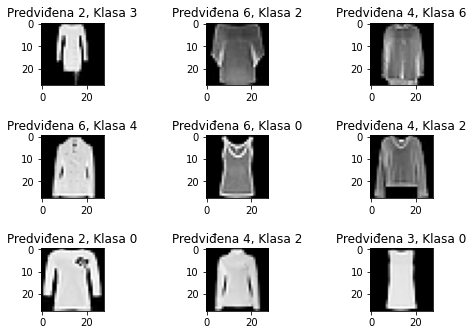

In [8]:
for j in range(0,9):  
    plt.subplot(3,3,j+1)    
    arr = X_test.iloc[diff[j],:].to_numpy()
    arr = arr.reshape(28,28)
    
    plt.subplots_adjust(left=-0.1,
                    bottom=-0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.8)
    
    plt.imshow(arr, cmap = 'gray')
    plt.title("Predviđena {}, Klasa {}".format(y_pred_np[diff[j]], y_test_np[diff[j]]))